### Seaborn Introduction
- Seaborn is a library that is used to make statistical graphics. It is an open-source library that is built on top of matplotlib and integrates closely with Numpy and pandas.
- helps explore and understand data by presenting graphics with useful visuals, making visualization the central part of exploring and understanding data. 
    - plotting functions operate on dataframes and arrays and performs mapping and statistical operations (internally) to create plots
    - additional benefit of the dataset-oriented API is that is allows you to focus on WHAT your plot means, and less on how to make the plots, promoting better understanding of the dataset 

#### Matplotlib
- Matplotlib is the core plotting engine used by Seaborn
    - potential disadvantage of Seaborn is that advanced customization requires alteration of Matplotlib objects and it is limited by Matplotlibs limitations such as some advanced plot types and thee-dimenensional plots 

#### NumPy
- Seaborn relies on NumPy for numerical operations, statistical computing and arrays
    - many calculations in Seaborn such as regression fitting use NumPy arrays 

#### Pandas
- Seaborn uses pandas data structures (Series and DataFrame) for inputs
    - allows for easy manipulation of subsets of data

#### Source Code
- library is hosted on GitHub: Seaborn Github Repository
    - it is open source and allows community contributions 

##### References: 
    - https://www.geeksforgeeks.org/introduction-to-seaborn-python/?ref=header_outind
    - https://seaborn.pydata.org/tutorial/introduction.html

### Seaborn Advantages and Limitations
    - the high-level interface for creating informative and well-appearing plots/graphs which are helpful for exploring and understanding complex data

##### Benefits
    - Seaborn can handle Pandas DataFrames more than matplotlib 
    - simplifies the creating of common statistical plots: bar graphs, scatter plots, box plots, etc. with minimal additional code
    - default themes creates publication-ready plots that are visually stunning 
    - easy to customize the appearance of plots, with a very wide range of plot types depending on use case/needs 
    - integrated with pandas DataFrames
        - makes it easy to visualize data by referencing column names without requiring indexing
    - built-in statistical functions display statistical analysis visually by adding density distributions or showing linear regression lines
    - since it is built/based on Matplotlib, users can further customize plots using Matplotlib commands
    - handles missing data well, so pre-processing of data prior to visualizing is often not necessary 
    - able to display complex data with multi-dimensional datasets
    - large amount of online materials/examples, videos, tutorials and troubleshooting tips 

##### Limitations
    - less customizable than Matplotlib, customization requires Matplotlib commands 
    - can have challenges with large datasets if attempting to rapidly update a plot, or plot a very large data set.
    - requires background knowledge of Matplotlib commands/syntax for customization and for more complex plots 
    - since it is dependent on Matplotlib, limitations of Matplotlib occur in Seaborn such as 3D plotting 
    - limited statistical functionality. Seaborn offers some statistical ability but other libraries are better for statistical analysis like SciPy
    - Seaborn does a good job with static visualizations, but is not ideal for interactive plots or interactive dashboards or web-based applications 

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Plots show up in notebook
%matplotlib inline

In [73]:
#Open the .names file to see the headers and unit

with open('arrhythmia.names') as f:
    print(f.read())
    
 # Age: Age in years , linear
 # Sex (0 = male; 1 = female) , nominal
 # Height: Height in centimeters , linear
 # Weight: Weight in kilograms , linear
 # QRS duration: Average of QRS duration in msec., linear
 # P-R interval: Average duration between onset of P and Q waves in msec., linear
 # Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
 # T interval: Average duration of T wave in msec., linear
 # P interval: Average duration of P wave in msec., linear Vector angles in degrees on front plane of:, linear
 # QRS
 # T
 # P
 # QRST
 # J
 # Heart rate: Number of heart beats per minute ,linear)

1. Title: Cardiac Arrhythmia Database

2. Sources:
   (a) Original owners od Database:
       -- 1. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr

       -- 2. Burak Acar, M.S.,
             Bilkent University, 
             EE Eng. Dept. 
             06533 Ankara, Turkey
             Email: buraka@ee.bilkent.edu.tr

       -- 2. Haldun Muderrisoglu, M.D., Ph.D., 
             Baskent University, 
             School of Medicine
             Ankara, Turkey

   (b) Donor: H. Altay Guvenir
              Bilkent University,
              Department of Computer Engineering and Information Science,
              06533 Ankara, Turkey
              Phone: +90 (312) 266 4133
              Email: guvenir@cs.bilkent.edu.tr

   (c) Date: January, 1998

3. Past Usage:
   1. H. Altay Guvenir, Bura

In [39]:
#Import data - read arrhythmia.data file comma-delimited
ar_df_full = pd.read_csv('arrhythmia.data', sep=',')

#Select the first 15 columns of the DataFrame, I did this because otherwise there are 270 columns and will challenge manipulation.
ar_df = ar_df_full.iloc[:, 0:15]

#Label the first 15 columns with labels according to arrhythmia.names file 
ar_df.columns = ['Age', 'Sex', 'Height', 'Weight', 'QRS Duration', 'P-R Interval', 'Q-T Interval', 'T-Interval', 
                                                        'P-Interval', 'QRS', 'T', 'P', 'QRST', 'J', 'Heart Rate']

#print DataFrame
ar_df.head()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T-Interval,P-Interval,QRS,T,P,QRST,J,Heart Rate
0,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
1,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
2,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
3,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?
4,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84


### Seaborn Example 1 - distplot()

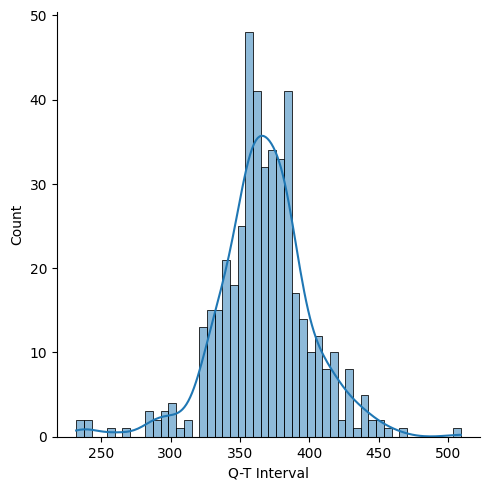

In [62]:

#displot() is a function to help visualize distributions, including histograms and kernel density estimation (kde) which displays estimate of distribution overlying histogram. 

#distplot() of 'Q-T Interval' colums with overlying kernal density estimation and data grouped across 50 bins  
sns.displot(ar_df['Q-T Interval'], kde = True, bins = 50)

### Seaborn Example 2 - jointplot()

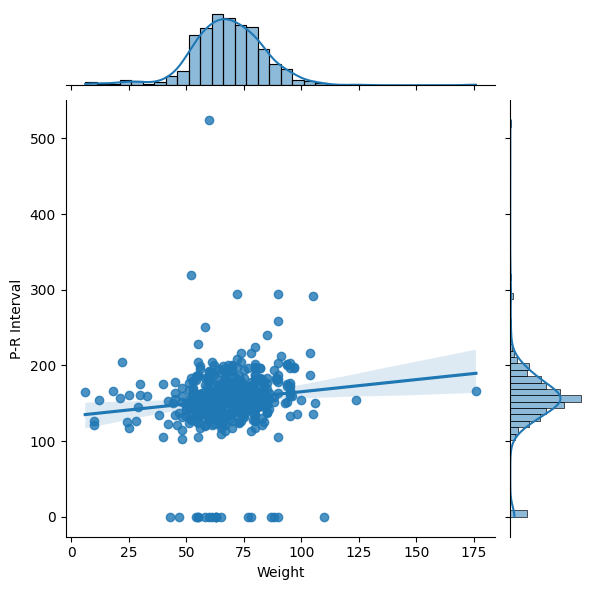

In [72]:
#jointplot() combines multiple kinds of plots to give summaries of a dataset. Jointplot focuses on a single relationship and plots the joint distribution between two variables PLUS the marginal distribution above and on the right axis of the plot.

#create jointplot() of 'Weight' and 'P-R Interval' variables with marginal distributions displayed of each variable. 
sns.jointplot(x = 'Weight', y = 'P-R Interval', data = ar_df, kind = 'reg') 

### Seaborn Example 3 - pairplot()

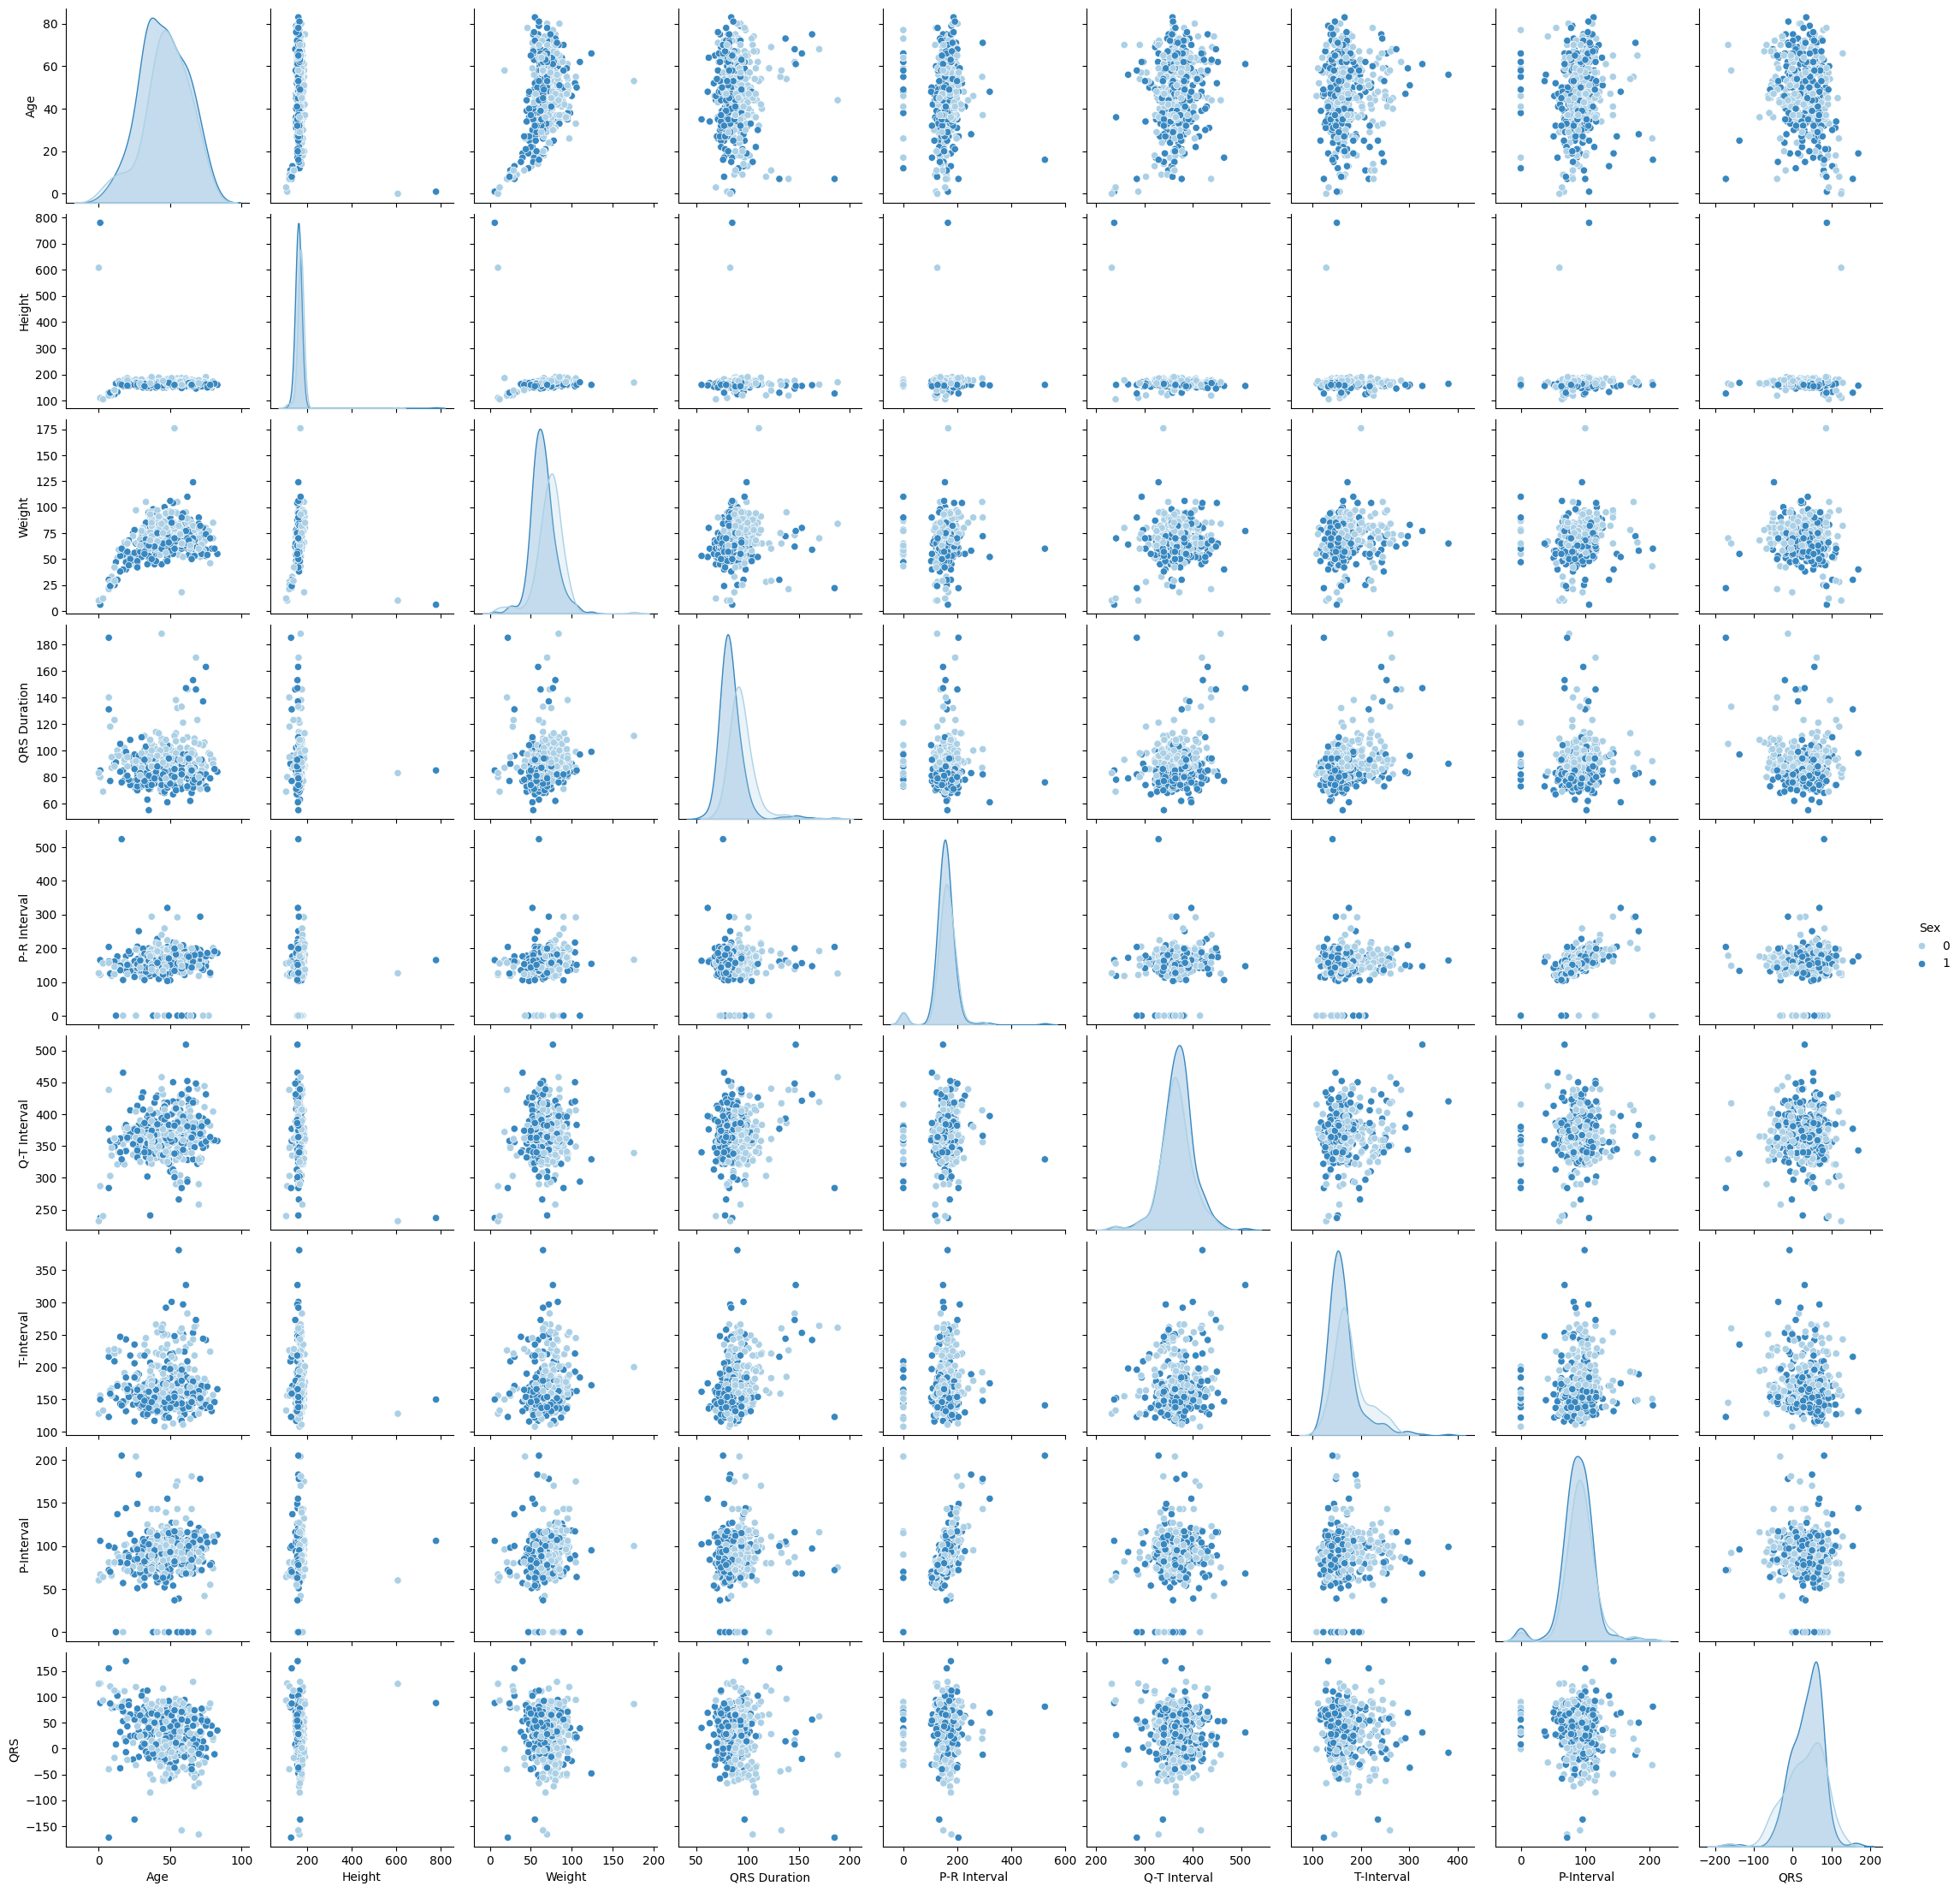

In [74]:
#pairplot() shows joint and marginal distributions for ALL relationships and variables. Great view of data to see relationships broadly

#creates pait plot of the DataFrame, with hue = 'Sex' 0=M, 1 = F, separating the data based on the categorical value M/F, and pallete = Blues to set color
sns.pairplot(ar_df, hue = 'Sex', palette = 'Blues')
